<a href="https://www.kaggle.com/code/mdrejwanurrahman/finver?scriptVersionId=195137865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import joblib
import tensorflow as tf
import tensorflow_probability as tfp

E0000 00:00:1725354462.404014      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D0903 09:07:42.412427335      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0903 09:07:42.412441732      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0903 09:07:42.412444977      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0903 09:07:42.412447448      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0903 09:07:42.412450212      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

## Import Dataset

In [4]:
df = pd.read_excel('/kaggle/input/pffp-data/PFFP_Data.xlsx', sheet_name='RAW', header=None)


## Dividing Input and Output

In [5]:

X = df.iloc[:211]  # Selects the first 211 rows for X
Y = df.iloc[211:212] # Class labels
V = df.iloc[212:213] # Impact Velocity

Xa= np.array(X) #Converting to numpy array
Va= np.array(V) #Converting to numpy array

Norm_X= 100*Xa/Va # Dividing deceleration values by impact velocity and 100 is multiplied for numerical stability
# Norm_X =Xa

## Scalling of the Input

In [7]:
# Flatten the array to 1D
Norm_X_flattened = Norm_X.flatten()

# Create a MinMaxScaler object with range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the flattened array
Norm_X_scaled_flat = scaler.fit_transform(Norm_X_flattened.reshape(-1, 1))

# Reshape back to the original shape (211, 447)
Norm_X_scaled = Norm_X_scaled_flat.reshape(211, 447)


In [8]:
scaler_filename = 'scaler_fit.joblib'
joblib.dump(scaler, scaler_filename)

['scaler_fit.joblib']

## Encoding the Class Labels

In [9]:
# Convert the target variable to numeric labels if necessary
Ya= np.squeeze(np.array(Y))
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Ya)

In [10]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(Norm_X_scaled.T, y, test_size=0.15,stratify=y, random_state=482)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


pd_train = np.count_nonzero(X_train, axis=1)
max_dec_train = np.max(X_train, axis=1)

pd_test = np.count_nonzero(X_test, axis=1)
max_dec_test = np.max(X_test, axis=1)

XRF_train= np.column_stack((max_dec_train,pd_train))
XRF_test= np.column_stack((max_dec_test,pd_test))



# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(XRF_train, y_train)

# Predict probabilities for the test set
class_probs = clf.predict_proba(XRF_test)

# 'class_probs' now contains the class probabilities for each sample in the test set

predRF=np.argmax(class_probs,axis=1)


In [12]:
model_filename = 'random_forest_model.joblib'
joblib.dump(clf, model_filename)

['random_forest_model.joblib']

In [13]:
# X_testRF_DF = pd.DataFrame(X_testRF)
# y_testRF_DF = pd.DataFrame(y_testRF)
# predRF_DF = pd.DataFrame(predRF)
# predRF_value_DF = pd.DataFrame(predRF_value)
# X_testRF_DF.to_csv('X_testRF_DF.csv', index=False)
# y_testRF_DF.to_csv('y_testRF_DF.csv', index=False)
# predRF_DF.to_csv('predRF_DF.csv', index=False)
# predRF_value_DF.to_csv('predRF_value_DF.csv', index=False)

In [14]:
# X_testRF_DF.to_csv('X_testRF_DF.csv', index=False)
# y_testRF_DF.to_csv('y_testRF_DF.csv', index=False)
# predRF_DF.to_csv('predRF_DF.csv', index=False)
# predRF_value_DF.to_csv('predRF_value_DF.csv', index=False)

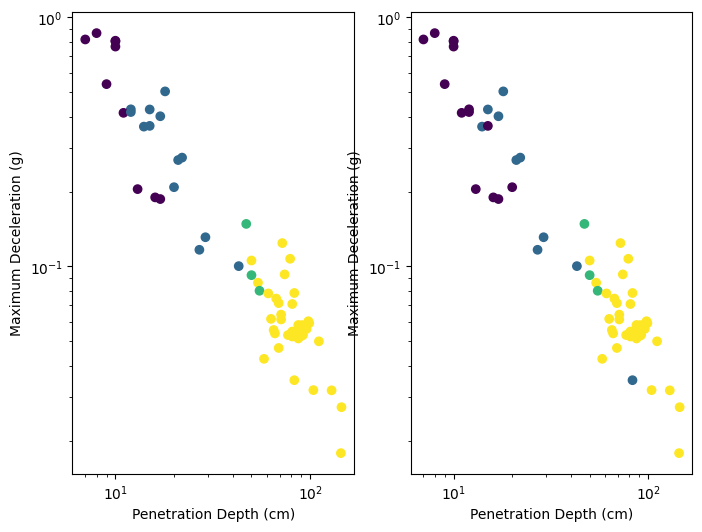

In [15]:
from matplotlib.axis import YTick
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].scatter(XRF_test[:,1], XRF_test[:,0], c=predRF)

# Add labels and a title
axs[0].set_xlabel('Penetration Depth (cm)')
axs[0].set_ylabel('Maximum Deceleration (g)')
# plt.title('Scatter Plot Example')
axs[0].set_xscale('log')
axs[0].set_yscale('log')


axs[1].scatter(XRF_test[:,1], XRF_test[:,0], c=y_test)

# Add labels and a title
axs[1].set_xlabel('Penetration Depth (cm)')
axs[1].set_ylabel('Maximum Deceleration (g)')
# plt.title('Scatter Plot Example')
axs[1].set_xscale('log')
axs[1].set_yscale('log')


plt.show()

Scalling the Input

In [16]:
Norm_X_scaled.shape

(211, 447)

Test Train Split

In [17]:
# Norm_X_scaled=Norm_X_scaled.T

## Oversampling

In [18]:
ada = ADASYN(random_state=50)
X_train_balanced, y_train_balanced = ada.fit_resample(X_train, y_train)

In [19]:

X_test = np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])


## One Hot Encoding

In [20]:
y_train_hot = to_categorical(y_train_balanced, num_classes=4)

In [21]:
import tensorflow as tf
import tensorflow_probability as tfp

seed = 42
sanitized_seed = tfp.random.sanitize_seed(seed)

# Define the kernel divergence function
def kernel_divergence_fn(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / float(X_train_balanced.shape[0])

# Model building
class BayesianConv1DModel(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.conv1 = tfp.layers.Convolution1DFlipout(32, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.conv2 = tfp.layers.Convolution1DFlipout(64, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tfp.layers.DenseFlipout(1024, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense2 = tfp.layers.DenseFlipout(64, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense3 = tfp.layers.DenseFlipout(4, activation='softmax', kernel_divergence_fn=kernel_divergence_fn)

    def __call__(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# Instantiate the model
model = BayesianConv1DModel()

# Define loss function
def loss_fn(labels, predictions):
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(labels, predictions))

# Define the training step
def train_step(model, inputs, labels, optimizer):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss



I0000 00:00:1725354523.232575      13 service.cc:145] XLA service 0x5be1ec51ce90 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725354523.232631      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1725354523.232636      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1725354523.232639      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1725354523.232642      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1725354523.232644      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1725354523.232647      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1725354523.232650      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1725354523.232653      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


In [22]:
X_train_balanced.shape

(909, 211)

In [23]:
import numpy as np

X_train_balanced = np.reshape(X_train_balanced, (X_train_balanced.shape[0], 211, 1))
# Convert the training data to a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_hot))

# Batch the dataset and shuffle it if necessary
train_dataset = train_dataset.batch(32)

In [24]:
# Example training loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epoch = 0
loss = float('inf')  # Initialize loss with a large number

while loss > 0.05:
    for inputs, labels in train_dataset:
        loss = train_step(model, inputs, labels, optimizer)
    epoch += 1
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

    # Optionally, include a break condition to avoid infinite loops
    if epoch > 20:  # Example: Stop training after 1000 epochs if loss is not below 0.05
        print("Stopping early after 20 epochs.")
        break

/usr/local/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(
/usr/local/lib/python3.10/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1, Loss: 1.46237051486969
Epoch 2, Loss: 1.4879472255706787
Epoch 3, Loss: 1.4328763484954834
Epoch 4, Loss: 1.4273285865783691
Epoch 5, Loss: 1.4106730222702026
Epoch 6, Loss: 1.424879789352417
Epoch 7, Loss: 1.4188411235809326
Epoch 8, Loss: 1.325886845588684
Epoch 9, Loss: 0.8419479727745056
Epoch 10, Loss: 1.384116291999817
Epoch 11, Loss: 1.2648980617523193
Epoch 12, Loss: 1.3807991743087769
Epoch 13, Loss: 0.610039472579956
Epoch 14, Loss: 1.264144778251648
Epoch 15, Loss: 0.9423604607582092
Epoch 16, Loss: 0.6237876415252686
Epoch 17, Loss: 0.2971873879432678
Epoch 18, Loss: 0.15923339128494263
Epoch 19, Loss: 0.10731831192970276
Epoch 20, Loss: 0.15032996237277985
Epoch 21, Loss: 0.09284145385026932
Stopping early after 20 epochs.


Testing

In [25]:
import numpy as np

# Function to predict new data
def predict(model, new_data):
    """
    Generates predictions from the model for the given new data.

    Args:
    model: The trained Bayesian neural network model.
    new_data: A NumPy array or a TensorFlow tensor of new data to predict.

    Returns:
    A NumPy array of predictions.
    """
    # Ensure the input is a TensorFlow tensor
    new_data = tf.convert_to_tensor(new_data, dtype=tf.float32)

    # Perform a forward pass and obtain the logits
    logits = model(new_data)
    
    # Since the last layer uses softmax, the output will be the probabilities
    probabilities = tf.nn.softmax(logits)

    # Optionally, you can obtain the class predictions directly
#     class_predictions = tf.argmax(logits, axis=1)

    return probabilities.numpy()  # Convert probabilities to NumPy array for easier handling


In [32]:
# Set up checkpointing
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
manager = tf.train.CheckpointManager(checkpoint, directory='/kaggle/working/chckpnt/newcheckpoints', max_to_keep=3)

In [33]:
checkpoint.save(file_prefix='/kaggle/working/chckpnt/newcheckpoints')

'/kaggle/working/chckpnt/newcheckpoints-1'

In [28]:
# Example usage

predictions = predict(model, X_test)
class_predictions = tf.argmax(predictions, axis=1)
# print(predictions)


tf.Tensor(
[0 0 0 2 3 2 3 3 3 3 3 3 3 0 3 0 3 3 3 0 3 3 3 1 3 2 3 3 2 3 3 0 0 2 3 0 3
 0 3 3 2 2 3 2 0 2 3 3 3 0 3 3 2 0 1 1 2 1 3 3 3 0 1 1 3 3 3 2], shape=(68,), dtype=int64)


tf.Tensor(
[0 0 1 2 1 1 3 3 3 3 3 3 3 0 3 0 3 3 1 1 3 3 3 0 3 1 3 3 2 3 3 1 0 3 3 0 3
 1 3 3 2 1 3 2 0 3 3 3 3 1 3 3 2 0 1 1 2 1 3 3 3 1 1 1 3 3 3 3], shape=(68,), dtype=int64)
 

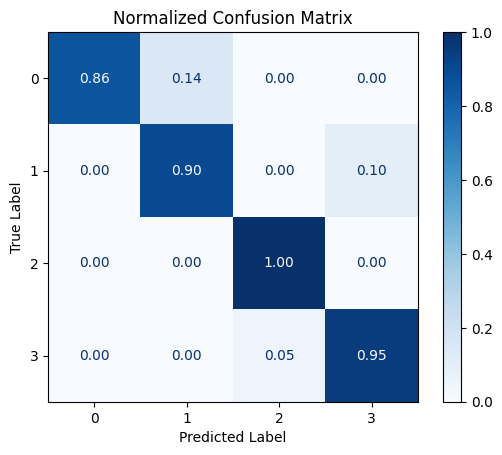

Accuracy: 92.65%


In [31]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


nm=np.sum(class_probs*predictions, axis=1)
nm = nm.reshape(68, 1)
val=class_probs*predictions
fp=val/nm

# Assuming predictions is the output from model.predict() and y_test is your true labels

# Convert predicted probabilities to class predictions
predicted_classes = np.argmax(fp, axis=1)

# Compute the normalized confusion matrix
cm = confusion_matrix(y_test, predicted_classes, normalize='true')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')  # Adjust format for percentage

# Display the plot
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

# Optionally, print the accuracy
accuracy = np.count_nonzero(predicted_classes == y_test) / len(y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")